In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ot.plot

from audio_ot import *

# 1 point

In [2]:
n_source_points = 1
source_support = np.random.rand(n_source_points, 2)
source = np.random.rand(n_source_points)
source /= source.sum()

n_target_points = 1
target_support = np.random.rand(n_target_points, 2)
target = np.random.rand(n_target_points)
target /= target.sum()


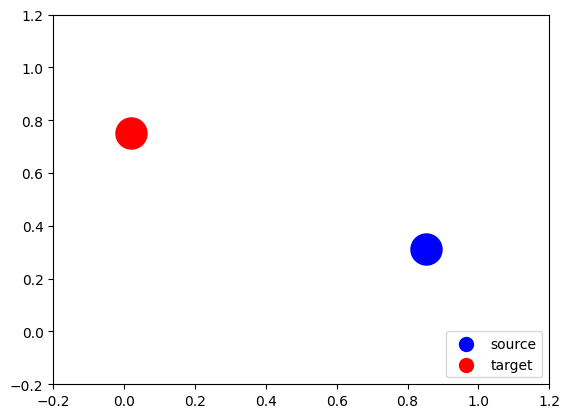

In [3]:
plt.scatter(source_support[:, 0], source_support[:, 1], c="b", s=source*500)
plt.scatter(target_support[:, 0], target_support[:, 1], c="r", s=target*500)
plt.xlim(left=-0.2, right=1.2)
plt.ylim(bottom=-0.2, top=1.2)

plt.scatter([], [], c="b", label="source", s=100)
plt.scatter([], [], c="r", label="target", s=100)
plt.legend(loc="lower right")

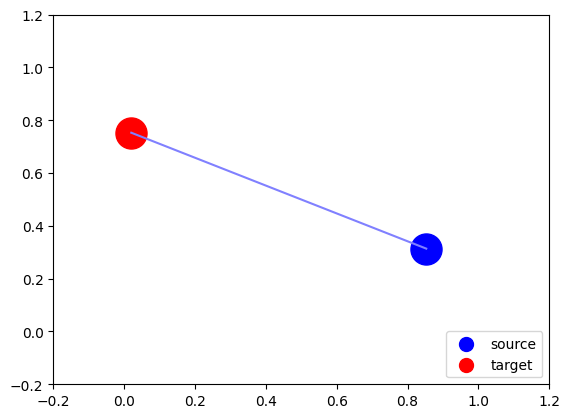

In [4]:
M = ot.dist(source_support, target_support)
plan = ot.emd(source, target, M)

ot.plot.plot2D_samples_mat(source_support, target_support, plan, c=[0.5, 0.5, 1])
plt.scatter(source_support[:, 0], source_support[:, 1], c="b", s=source*500)
plt.scatter(target_support[:, 0], target_support[:, 1], c="r", s=target*500)
plt.xlim(left=-0.2, right=1.2)
plt.ylim(bottom=-0.2, top=1.2)

plt.scatter([], [], c="b", label="source", s=100)
plt.scatter([], [], c="r", label="target", s=100)
plt.legend(loc="lower right")

In [5]:
def generate_interpolated_support(alpha, source_support, target_support):
    n = len(source_support)
    m = len(target_support)
    interpolated_support =  np.zeros((n*m, 2))
    for i, f_s in enumerate(source_support):
        for j, f_t in enumerate(target_support):
            f_alpha = (1 - alpha) * f_s + alpha * f_t
            interpolated_support[i*n + j] = f_alpha

    return interpolated_support

alpha = 0.5

interpolation_support = generate_interpolated_support(alpha, source_support, target_support)
interpolation = plan

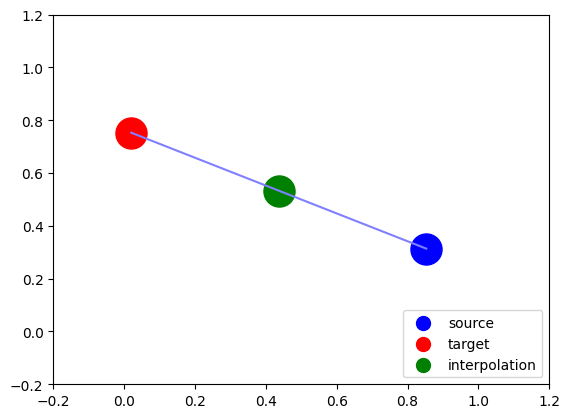

In [6]:
ot.plot.plot2D_samples_mat(source_support, target_support, plan, c=[0.5, 0.5, 1])
plt.scatter(source_support[:, 0], source_support[:, 1], c="b", s=source*500)
plt.scatter(target_support[:, 0], target_support[:, 1], c="r", s=target*500)
plt.scatter(interpolation_support[:, 0], interpolation_support[:, 1], c="g", s=interpolation*500)
plt.xlim(left=-0.2, right=1.2)
plt.ylim(bottom=-0.2, top=1.2)

plt.scatter([], [], c="b", label="source", s=100)
plt.scatter([], [], c="r", label="target", s=100)
plt.scatter([], [], c="g", label="interpolation", s=100)
plt.legend(loc="lower right")